Planteando objetivo:
Buscamos lugares de crecimiento en el numero de servicios de telecomunicaciones adquiridos, donde se van a encontrar focos importantes de potenciales clientes.
Buscar la fuga de clientes por localidades, e implementar en las mismas las tecnologias que ganan mas terreno en el mercado, lo cual puede ser por la calidad de las mismas.
En lo social, nos interesan sitios con poco acceso a internet, mucha poblacion/poco acceso.
La mala calidad en la conexion es el problema principal que capta un cliente y que puede producir una fuga del mismo, por lo tanto se va a buscar mejorar la misma para aumentar los ingresos y reducir los costos que produce este problema(en la atencion al cliente, o el tener que ir hasta el lugar donde se produce el problema).


https://adamo.es/es/blog/fibra-optica-vs-internet-satelite-que-es-mejor. Fibra optica es mejor para ayudar a mejorar el rendimiento, pero necesitas de una conexion fisica, lo que hace mejor la conexion satelital en caso de que estes en lugares aislados.

Como elegir la mejor conexion a internet : https://gluppi.com/claves-acceso-a-internet-empresa/

Grafico de lineas, con distintas provincias a las que haga foco, para ver como sube la velocidad media de bajada a lo largo del tiempo, como el grafico 8 de la api.

In [1]:
#Importamos las librerías a utilizar
import requests
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from datetime import datetime

Seleccionamos los dataframes que nos iban a servir según nuestros objetivos, los descargamos desde el portal 'https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/' en el cual elegimos los de nuestra preferencia.

En el pantallazo que obtuvimos durante el EDA, pudimos analizar las variables que había en los distintos dataframes y los tipos que habia en cada uno.

Tenemos variables cualitativas y cuantitativas como se esperaba. Las cuales son:

a)Cualitativas: provincias, partidos, localidades, tipos de conexiones que se utiliza(ADSL,CABLEMODEM,FIBRAOPTICA,SATELITAL....) son dicotomicas porque tienen o no.

b)Cuantitativas: Poblacion, mbps media de bajada, cantidad de clientes que tienen cada tipo de conexion, ingresos en miles de pesos.

In [38]:
df_hogares = pd.read_csv('Internet_Penetracion.csv')
df_ingresos = pd.read_csv('Internet_Ingresos.csv')
df_velocidades = pd.read_csv('Internet_Accesos-por-velocidad.csv')
df_tecnologias_periodos = pd.read_csv('Internet_Accesos-por-tecnologia.csv')
df_tecnologias_provincias = pd.read_csv('Internet_Accesos-por-tecnologia (1).csv')
df_velocidad_media = pd.read_csv('historico_velocidad_internet.csv')
df_velocidad_provincias = pd.read_csv('historico_velocidad_internet (1).csv')
data10 = pd.read_csv('ConectividadalserviciodeInternet_2776151672699723069.csv')
#data1 = pd.read_csv('Internet_Penetracion (1).csv')
#data3 = pd.read_csv('Internet_BAF.csv')
#data4 = pd.read_csv('Internet_BAF (1).csv')
#data11 = pd.read_csv('AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171672699701069.csv')
#data12 = pd.read_csv('AccesosaInternetfijoporvelocidadbajadayprovincia_2791741672699158339.csv')
#data13 = pd.read_csv('AccesosaInternetfijoporvelocidadbajadayprovincia_2791741672699158339 (1).csv')
#data14 = pd.read_csv('AccesosaInternetfijoportecnologiaylocalidad_2791751672699712303.csv')    -> Este lo uso si quiero ver las conexiones por localidad.
#data15 = pd.read_csv('Listadodelocalidadesconconectividadainternet_2750221672699471313.csv')

Procedimos a investigar cada dataframe, en los cuales notamos que eran de muy buena calidad y bastante prolijos. En cuanto a valores nulos habia una sola fila entre todos los dataframes que tenia, y decidimos eliminarlos.

In [32]:
df_tecnologias_provincias.dropna(inplace=True)
df_tecnologias_provincias.isna().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

---

In [36]:
#En el dataframe de velocidades, renombramos y removimos las columnas que necesitabamos.
df_velocidades.rename({'Entre 512 Kbps y 1 Mbps': 'Hasta 1 Mbps', 'Entre 1 Mbps y 6 Mbps': 'Hasta 10 Mbps'}, axis=1, inplace=True)
df_velocidades.drop(columns=['Unnamed: 11', 'Hasta 512 kbps','Entre 6 Mbps y 10 Mbps'],inplace=True)

In [37]:
df_velocidades

,Año,Trimestre,Hasta 1 Mbps,Hasta 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,1,174.620,1.263.273,967.508,509.830,6.336.187,198.333,10.624.009
1,2021,4,111.045,1.413.208,976.539,558.358,6.032.322,194.251,10.489.794
2,2021,3,121.785,2.550.229,710.122,536.364,4.948.174,163.269,10.085.541
3,2021,2,122.368,2.531.271,693.277,647.401,4.661.291,167.369,9.863.084
4,2021,1,120.648,2.593.477,737.930,595.920,4.379.965,186.797,9.647.972
5,2020,4,121.205,2.622.638,786.595,582.420,4.239.237,185.102,9.571.562
6,2020,3,126.081,2.637.984,799.350,538.567,4.053.461,201.777,9.356.199
7,2020,2,130.766,2.651.502,807.775,523.437,3.711.499,194.008,9.031.056
8,2020,1,141.270,2.649.819,814.470,532.309,3.500.882,194.212,8.812.426
9,2019,4,105.524,2.792.684,851.619,1.004.083,2.831.253,200.162,8.793.181


En el dataframe de los tipos de conexiones, vimos qie estén balanceados los datasets, y un poco de cómo estaban compuestos los mismos.

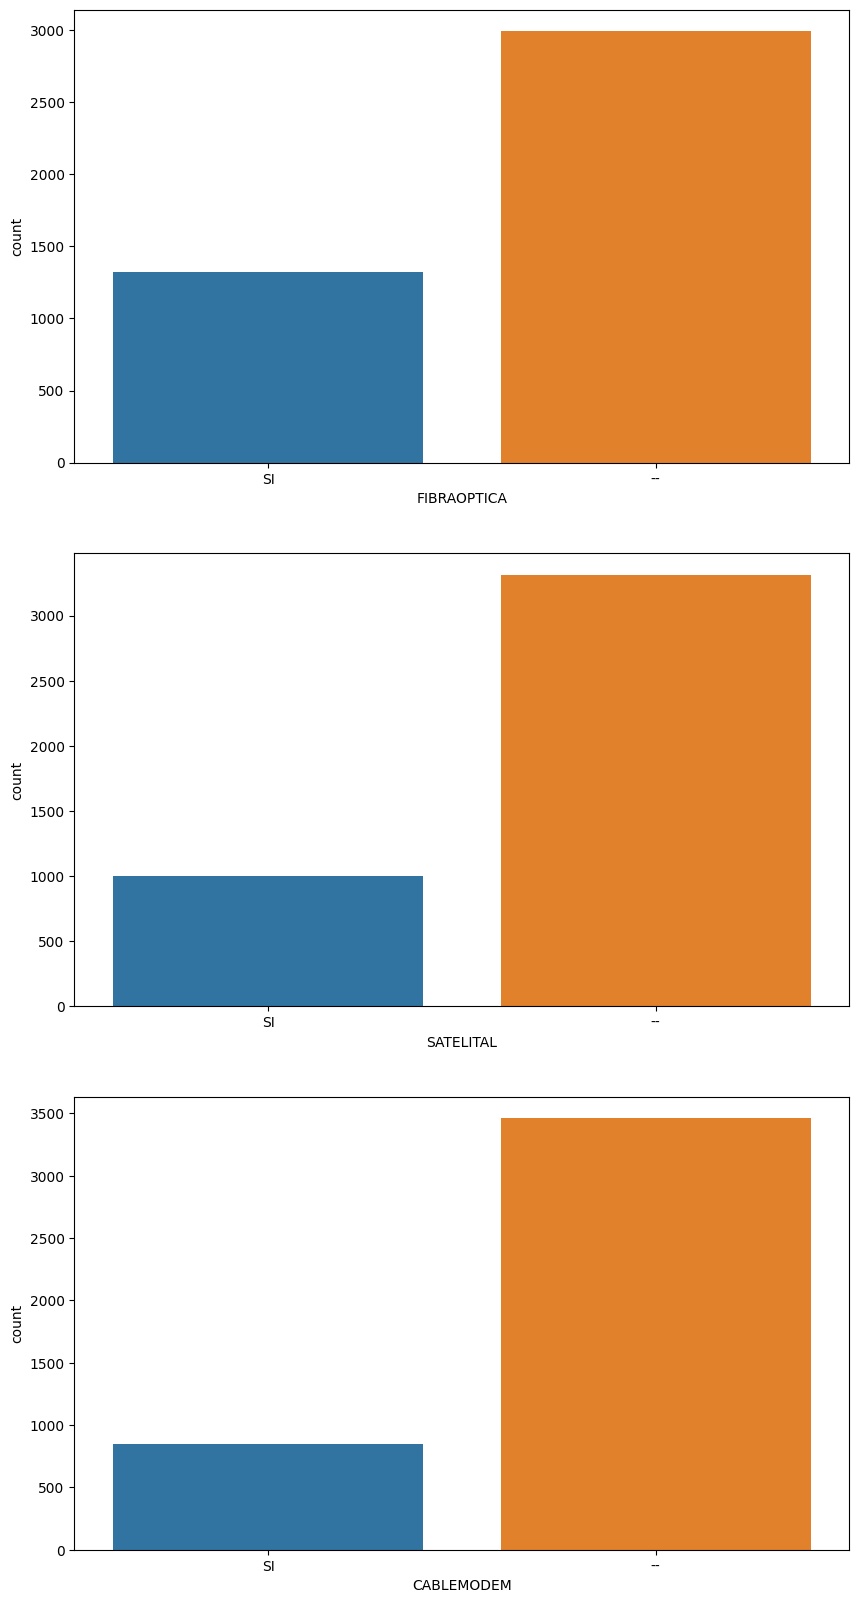

In [5]:
#vemos que están balanceadas, las localidades que tienen o no algunos tipos de conexiones.
plt.figure(figsize = (10,20))

plt.subplot(3,1,1)
sns.countplot(x=data10['FIBRAOPTICA'])

plt.subplot(3,1,2)
sns.countplot(x=data10['SATELITAL'])

plt.subplot(3,1,3)
sns.countplot(x=data10['CABLEMODEM'])

plt.show()

In [6]:
df_ingresos

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,1,51.432.896,Ene-Mar 2022
1,2021,4,45.467.887,Oct-Dic 2021
2,2021,3,42.999.944,Jul-Sept 2021
3,2021,2,38.239.667,Abr-Jun 2021
4,2021,1,36.676.371,Ene-Mar 2021
5,2020,4,33.539.703,Oct-Dic 2020
6,2020,3,31.997.445,Jul-Sept 2020
7,2020,2,32.102.476,Abr-Jun 2020
8,2020,1,29.946.216,Ene-Mar 2020
9,2019,4,24.169.251,Oct-Dic 2019


In [44]:
 #Borramos algunas columnas que no nos van a servir para los objetivos de nuestro análisis.
data10.drop(columns=['link','Latitud','Longitud'],inplace=True)


***

In [45]:
#Con este df voy a hacer la normalizacion de la provincia, y crear una tabla a partir de la cual relacionar las demas
df_ubicacion = data10[['Provincia','Partido','Localidad','Poblacion']]

In [48]:
#Realizamos un LabelEncoding para crear un Id de las provincias, y crear una columna nueva del Id a partir de estos valores asignados.
le = LabelEncoder()

df_ubicacion['Id_Provincia'] = le.fit_transform(df_ubicacion['Provincia'])
df_ubicacion['Provincia'] = df_ubicacion['Provincia'].str.title()
df_ubicacion

C:\Users\homer\AppData\Local\Temp\ipykernel_18920\2618666211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ubicacion['Id_Provincia'] = le.fit_transform(df_ubicacion['Provincia'])
C:\Users\homer\AppData\Local\Temp\ipykernel_18920\2618666211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ubicacion['Provincia'] = df_ubicacion['Provincia'].str.title()


,Provincia,Partido,Localidad,Poblacion,Id_Provincia
0,Buenos Aires,25 de Mayo,25 de Mayo,23408,0
1,Buenos Aires,25 de Mayo,Agustín Mosconi,280,0
2,Buenos Aires,25 de Mayo,Del Valle,899,0
3,Buenos Aires,25 de Mayo,Ernestina,145,0
4,Buenos Aires,25 de Mayo,Gobernador Ugarte,547,0
...,...,...,...,...,...
4307,Jujuy,El Carmen,Los Lapachos (Est. Maquinista Verón),864,9
4308,Jujuy,El Carmen,Loteo San Vicente,211,9
4309,Jujuy,El Carmen,Manantiales,326,9
4310,Jujuy,El Carmen,Monterrico,11591,9


In [8]:
#Vamos a exportar nuestro dataframe terminado a csv, con el metodo 'to_csv'
df_hogares.to_csv('Datasets/df_hogares.csv')
df_velocidades.to_csv('Datasets/df_velocidades.csv')
df_ingresos.to_csv('Datasets/df_ingresos.csv')
df_tecnologias_periodos.to_csv('Datasets/df_tecnologias_periodos.csv')
df_tecnologias_provincias.to_csv('Datasets/df_tecnologias_provincias.csv')
df_velocidad_media.to_csv('Datasets/df_velocidad_media.csv')
df_velocidad_provincias.to_csv('Datasets/df_velocidad_provincias.csv')